# Εργαστηριακή Άσκηση Υπολογιστικής Νοημοσύνης
## Μέρος Α΄, Χρονολόγηση Αρχαίων Επιγραφών με Χρήση Νευρωνικών Δικτύων

Όνομα: Ζαχουλίτης Κωνσταντίνος Γεώργιος <br/>
ΑΜ: 1072578 <br/>
Έτος: 5ο <br/>
Email: up1072578@ac.upatras.gr

### Περιβάλλον Υλοποίησης
CPU:    AMD 6-core 64-bit <br/>
OS:     Windows 11 23H2 <br/>
Python: 3.12.0 <br/>
IDE:    Pycharm Professional

### Α1. Προεπεξεργασία και Προετοιμασία δεδομένων

#### α) Κωδικοποίηση και προεπεξεργασία δεδομένων

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

df = pd.read_csv("iphi2802.csv", delimiter="\t", encoding='utf-8')


pattern = r'[.,\d\[\]-]'

# Clean the text data
for i in range(len(df)):
    sentence = (df['text'].iloc[i]).lower().split()
    for index, word in enumerate(sentence):
        clean_word = re.sub(pattern, '', word.strip())
        sentence[index] = clean_word
    clean_sent = ' '.join(sentence)
    df.loc[i, 'text'] = clean_sent


kwargs = {
    'ngram_range': (1, 1),
    'dtype': 'int',
    'strip_accents': 'unicode',
    'decode_error': 'replace',
    'analyzer': 'word',
    'min_df': 2,
    'max_df': 0.1,
    'max_features': 1000,
}


vectorizer = TfidfVectorizer(**kwargs)
X_tfidf = vectorizer.fit_transform(df['text'])
arr = X_tfidf.toarray()
#df['Text_IDF'] = list(X_tfidf.toarray())

tfidf_df = pd.DataFrame(X_tfidf.toarray())#, columns=vectorizer.get_feature_names_out())
df['Text_IDF'] = tfidf_df.values.tolist()


vocabulary = vectorizer.vocabulary_


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:2072: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int 'dtype' will be converted to np.float64.
  warnings.warn(


In [46]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df['text_num'] = pd.Series
for index, sentence in enumerate(df['Text_IDF']):
    df.at[index, 'text_num'] = sum(df['Text_IDF'].iloc[index])


#### β) Κανονικοποίηση (Normalization ή min-max scaling)

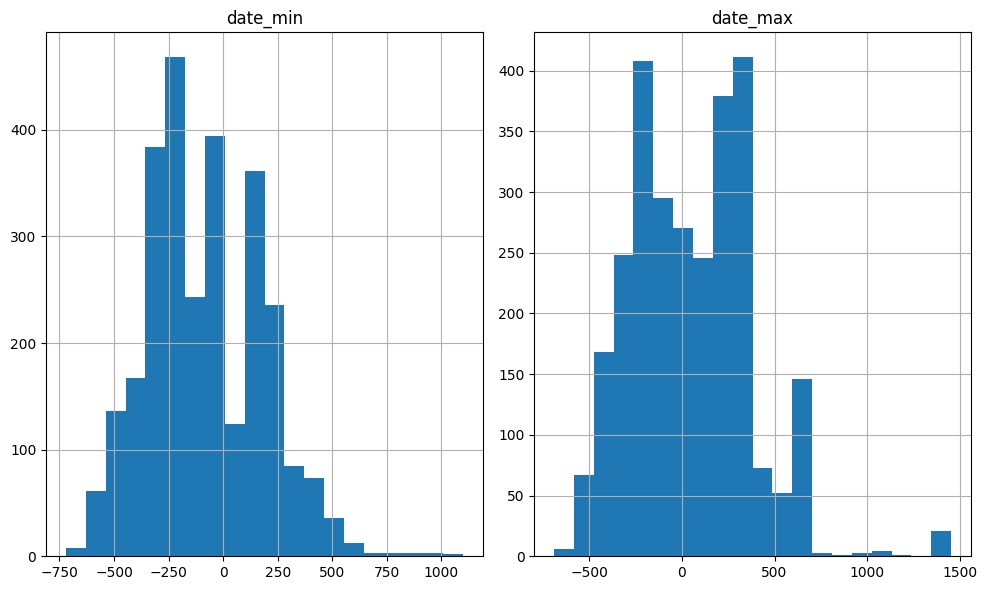

In [47]:
import matplotlib.pyplot as plt

#df[['Text_IDF', 'date_min', 'date_max']].hist(figsize=(10, 6), bins=20)
df[['text_num', 'date_min', 'date_max']].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()

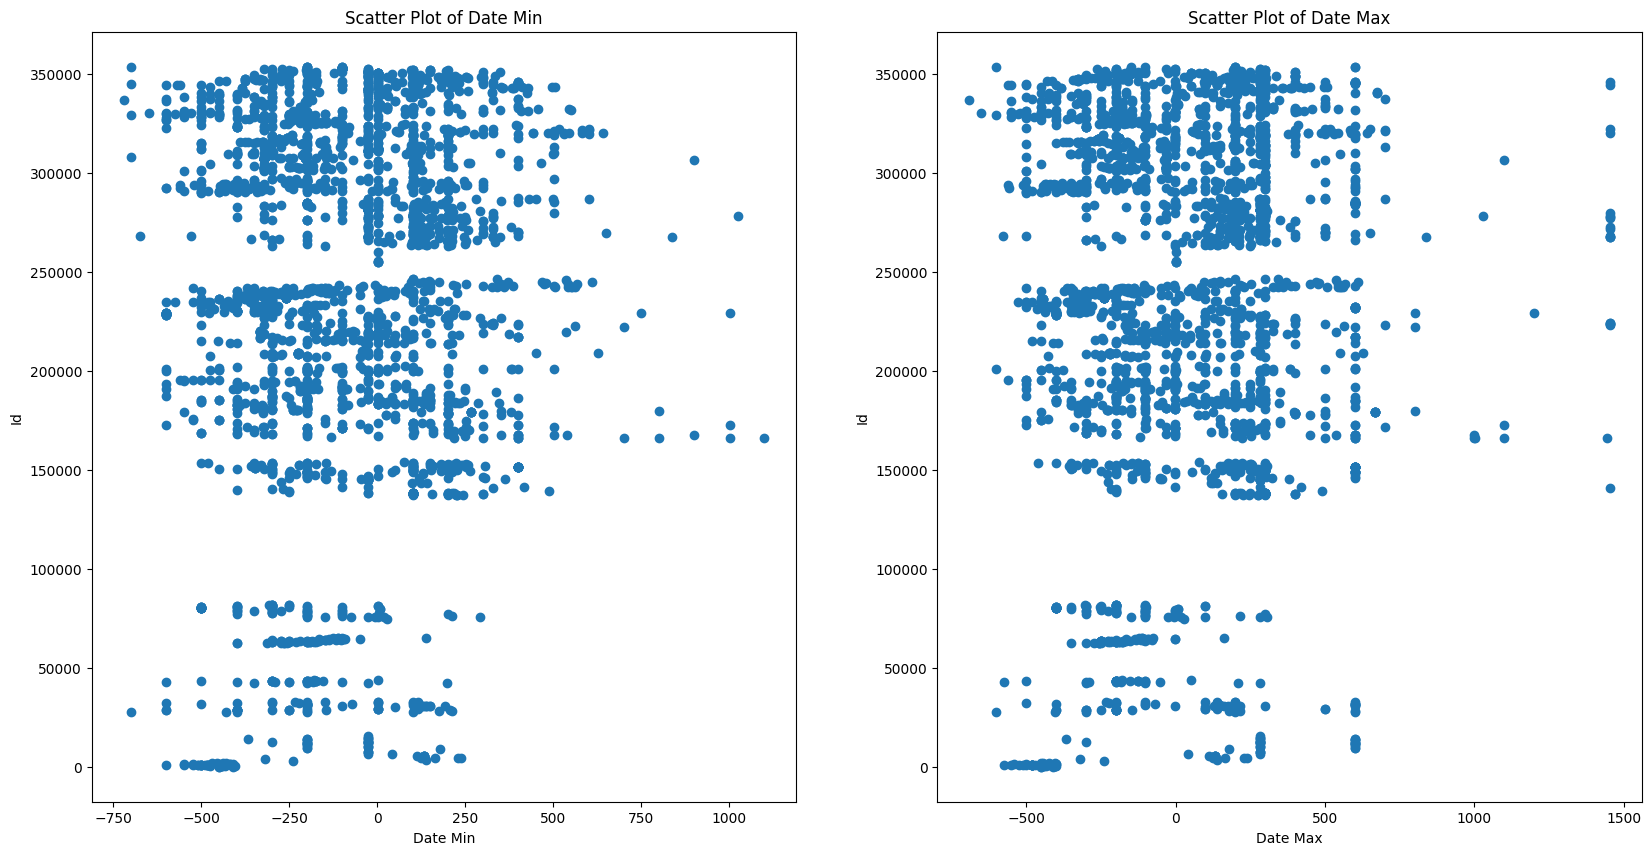

In [48]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
x_values = df['date_min']
y_values = df['id']
x_values_2 = df['date_max']
y_values_2 = df['id']

fig, axes = plt.subplots(1, 2, figsize=(20, 10))


axes[0].scatter(x_values, y_values)
axes[0].set_xlabel('Date Min')
axes[0].set_ylabel('Id')
axes[0].set_title('Scatter Plot of Date Min')

axes[1].scatter(x_values_2, y_values_2)
axes[1].set_xlabel('Date Max')
axes[1].set_ylabel('Id')
axes[1].set_title('Scatter Plot of Date Max')


# plt.tight_layout()
plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd


X_text_idf = X_tfidf
scaler = MinMaxScaler() # region_main_id, region_sub_id
X_numeric = scaler.fit_transform(df[['region_main_id', 'region_sub_id', 'date_min', 'date_max']])
norm_dataset = pd.concat([df['text_num'], pd.DataFrame(X_numeric, columns=['region_main_id', 'region_sub_id', 'date_min', 'date_max'])], axis=1)


#### γ) Διασταυρούμενη Επικύρωση (cross-validation)

In [50]:
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

# #df[['Text_IDF','region_main_id', 'region_sub_id', 'date_min','date_max']]
X = norm_dataset.values
zeros_array = np.zeros(len(df))
y = zeros_array
kfold = StratifiedKFold(n_splits=5, shuffle=True)

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]


### Α2. Επιλογή αρχιτεκτονικής

#### α) Η εκπαίδευση και αξιολόγηση των μοντέλων με τη χρήση της Ρίζας του Μέσου Τετραγωνικού Σφάλματος (RMSE)


In [51]:
from keras import backend as K
import tensorflow as tf

@tf.function
def crmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


#### β) Συνάρτηση ενεργοποίησης για τους κρυφούς κόμβους

In [52]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense


rmseList = []

X = X.astype('float64')
y = y.astype('float64')

for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):

    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    model = Sequential()
    model.add(Dense(10, activation="relu", input_dim=5))
    model.compile(optimizer='sgd', loss=crmse, metrics=['mae',crmse])
    model.fit(X_train, y_train)

    # Evaluate model
    scores = model.evaluate(X_val, y_val, verbose=0)
    rmseList.append(scores[0])
    print("Fold :", fold, " RMSE:", scores[0])

print("RMSE: ", np.mean(rmseList))


71/71 [==============================] - 2s 5ms/step - loss: 0.3259 - mae: 0.1959 - crmse: 0.3232
Fold : 0  RMSE: 0.1974182277917862
71/71 [==============================] - 2s 9ms/step - loss: 0.4391 - mae: 0.1824 - crmse: 0.4348
Fold : 1  RMSE: 0.19297896325588226
71/71 [==============================] - 2s 8ms/step - loss: 0.4583 - mae: 0.2148 - crmse: 0.4540
Fold : 2  RMSE: 0.22012083232402802
71/71 [==============================] - 2s 7ms/step - loss: 0.5492 - mae: 0.3002 - crmse: 0.5449
Fold : 3  RMSE: 0.34669703245162964
71/71 [==============================] - 1s 5ms/step - loss: 0.5456 - mae: 0.2914 - crmse: 0.5413
Fold : 4  RMSE: 0.33620646595954895
RMSE:  0.258684304356575


#### γ) Συνάρτηση ενεργοποίησης για τους κόμβους εξόδου

In [53]:
"""

Για το επίπεδο εξόδου, θα χρησιμοποιήσω τη συνάρτηση ενεργοποίησης "γραμμική".
Αυτό συμβαίνει διότι η γραμμική συνάρτηση ενεργοποίησης δεν επιβάλλει κάποιον
περιορισμό στο εύρος των εξόδων και επιτρέπει στο
μοντέλο να παράγει τιμές σε οποιοδήποτε εύρος χρονολογιών χρειαστεί.
"""

'\n\nΓια το επίπεδο εξόδου, θα χρησιμοποιήσω τη συνάρτηση ενεργοποίησης "γραμμική".\nΑυτό συμβαίνει διότι η γραμμική συνάρτηση ενεργοποίησης δεν επιβάλλει κάποιον\nπεριορισμό στο εύρος των εξόδων και επιτρέπει στο\nμοντέλο να παράγει τιμές σε οποιοδήποτε εύρος χρονολογιών χρειαστεί.\n'

#### δ) Πειραματισμός με 3 διαφορετικές τιμές για τον αριθμό των νευρώνων του κρυφού επιπέδου

71/71 [==============================] - 1s 3ms/step - loss: 0.3864 - mae: 0.2025 - crmse: 0.3846
RMSE 0:  0.10772334486246109
RMSE 1:  0.28153317272663114
RMSE 2:  0.2679957985877991


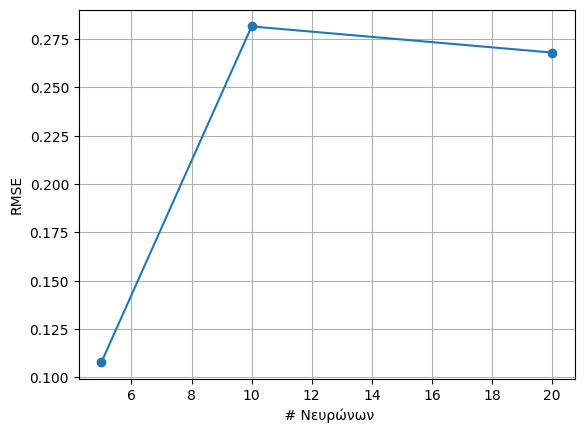

In [54]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

nodes = [5, 10, 20]
node_results = []

X = X.astype('float64')
y = y.astype('float64')
for node_ind, node_num in enumerate(nodes):
    rmseList = []
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model = Sequential()
        model.add(Dense(node_num, activation="relu", input_dim=5))
        model.compile(optimizer='sgd', loss=crmse, metrics=['mae',crmse])
        model.fit(X_train, y_train)

        scores = model.evaluate(X_val, y_val, verbose=0)
        rmseList.append(scores[0])
    node_results.append(np.mean(rmseList))

for i in range(len(node_results)):
  if not isinstance(node_results[i], (float, int)):
      node_results[i] = 0
  print(f"RMSE {i}: ", node_results[i])

plt.plot(nodes, node_results, marker='o')
plt.xlabel(' # Νευρώνων')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()


#### ε) Προσθήκη ενός έως δύο ακόμα κρυφών επιπέδων στο δίκτυο (Η2, Η3). Πειραματισμός με τον αριθμό των κόμβων

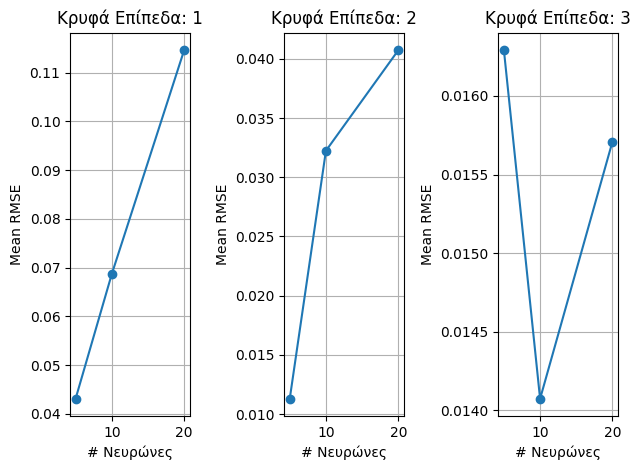

In [55]:
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
layer_results = []

for layer in layers:
    node_results = []
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            for i in range(layer):
                model.add(Dense(node_num, activation="relu", input_dim=5))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            model.fit(X_train, y_train, verbose=0)
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
        node_results.append(np.mean(rmseList))
    layer_results.append(node_results)

for i, layer in enumerate(layers):
    plt.subplot(1, 3, i+1)
    plt.plot(nodes, layer_results[i], marker='o')
    plt.xlabel('# Nευρώνες')
    plt.ylabel('Mean RMSE')
    plt.title(f'Κρυφά Επίπεδα: {layer}')
    plt.grid(True)

plt.tight_layout()
plt.show()


#### στ) Κριτήριο τερματισμού

71/71 [==============================] - 2s 10ms/step - loss: 0.0511 - mae: 0.1024 - val_loss: 0.0219 - val_mae: 0.0626


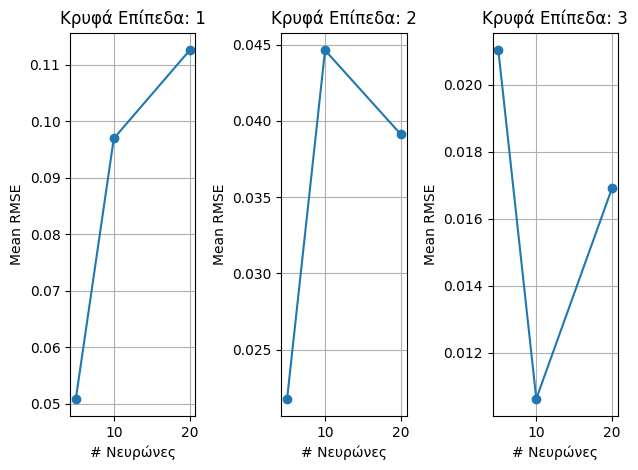

In [56]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
layer_results = []

for layer in layers:
    node_results = []
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            for i in range(layer):
                model.add(Dense(node_num, activation="relu", input_dim=5))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            #model.fit(X_train, y_train, verbose=0)
            history = model.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[early_stopping])
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
        node_results.append(np.mean(rmseList))
    layer_results.append(node_results)

for i, layer in enumerate(layers):
    plt.subplot(1, 3, i+1)
    plt.plot(nodes, layer_results[i], marker='o')
    plt.xlabel('# Nευρώνες')
    plt.ylabel('Mean RMSE')
    plt.title(f'Κρυφά Επίπεδα: {layer}')
    plt.grid(True)

plt.tight_layout()
plt.show()


### Α3. Μεταβολές στον ρυθμό εκπαίδευσης και σταθεράς ορμής

Best Learning Rate: 0.1
Best Momentum: 0.6


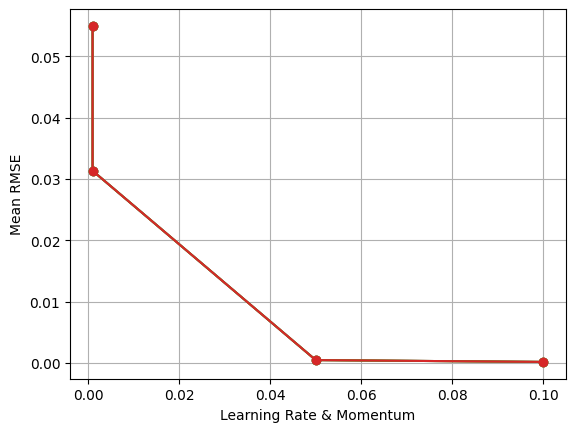

In [57]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
layers = [1, 2, 3]
learning_rates = [0.001, 0.001, 0.05, 0.1]
momentum_values = [0.2, 0.6, 0.6, 0.6]
pair_results = []

best_rmse = float('inf')
best_lr = None
best_momentum = None

for common_index, lr in enumerate(learning_rates):
    momentum = momentum_values[common_index]
    for layer in layers:
        for node_num in nodes:
            rmseList = []
            for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
                early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                                               restore_best_weights=True)
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]
                model = Sequential()
                for i in range(layer):
                    model.add(Dense(node_num, activation="relu", input_dim=5))
                optimizer = SGD(learning_rate=lr, momentum=momentum)
                model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
                history = model.fit(X_train, y_train,
                                    validation_data=(X_val, y_val),
                                    callbacks=[early_stopping], verbose=0)
                scores = model.evaluate(X_val, y_val, verbose=0)
                rmseList.append(scores[0])
                mean_rmse = np.mean(rmseList)

            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_lr = lr
                best_momentum = momentum
    pair_results.append(mean_rmse)

print("Best Learning Rate:", best_lr)
print("Best Momentum:", best_momentum)

for i, lr in enumerate(learning_rates):
    plt.plot(learning_rates, pair_results, marker='o',
             label=f'Learning Rate = {lr}, Momentum = { momentum_values[i]}')
plt.xlabel('Learning Rate & Momentum')
plt.ylabel('Mean RMSE')
plt.grid(True)
plt.show()



### Α4. Ομαλοποίηση

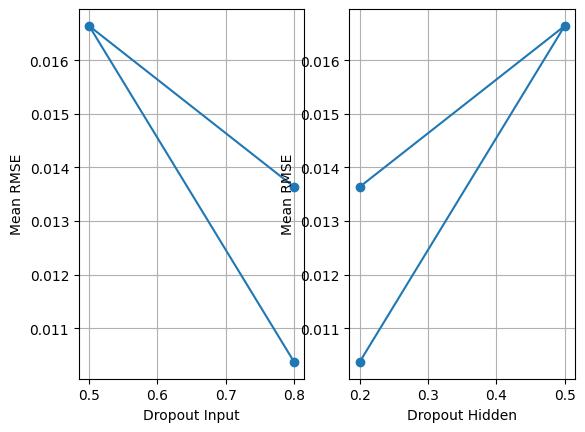

In [69]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

nodes = [5, 10, 20]
dropout_in = [0.8, 0.5, 0.8]
dropout_hid = [0.2, 0.5, 0.2]
drop_results = []

for common_ind, dropout_rate_in in enumerate(dropout_in):
    dropout_rate_hid = dropout_hid[common_ind]
    for node_num in nodes:
        rmseList = []
        for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            model = Sequential()
            model.add(Dropout(rate=dropout_rate_in, input_shape=(5,)))
            model.add(Dense(node_num, activation="relu"))
            model.add(Dropout(rate=dropout_rate_hid))
            model.compile(optimizer='sgd', loss='mse', metrics=['mae'])
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val), verbose=0)
            scores = model.evaluate(X_val, y_val, verbose=0)
            rmseList.append(scores[0])
    drop_results.append(np.mean(rmseList))

plt.subplot(1,2,1)
plt.plot(dropout_in, drop_results, marker='o', label=f'Dropout Input')
plt.xlabel('Dropout Input')
plt.ylabel('Mean RMSE')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(dropout_hid, drop_results, marker='o', label=f'Dropout Hid')
plt.xlabel('Dropout Hidden')
plt.ylabel('Mean RMSE')
plt.grid(True)


plt.show()


### A5. Γλωσσικά Μοντέλα (bonus)

In [70]:
from transformers import AutoTokenizer, AutoModel
tokeniser = AutoTokenizer.from_pretrained("pranaydeeps/Ancient-Greek-BERT")
model = AutoModel.from_pretrained("pranaydeeps/Ancient-Greek-BERT")




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/530k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/800k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/452M [00:00<?, ?B/s]